In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def generate_unit_circle_points(num_points):
    theta = np.random.uniform(0, 2 * np.pi, num_points)
    x = np.cos(theta)
    y = np.sin(theta)
    points = np.stack([x, y], axis=-1)
    return points

def scaled_unit_circle(M, K=50*np.pi, K_min=50.):
    k = generate_unit_circle_points(M)
    km = np.random.uniform(50., 50.*np.pi, M)
    k[:, 0] = km * k[:, 0]
    k[:, 1] = km * k[:, 1]
    return k

def generate_k_vectors(K, K_min=np.pi, num_per_dim=10):
    """
    Generate wavevectors with |k| < kmax
    on a uniform 2D grid using fftfreq
    """
    max_threshhold = K**2
    min_threshhold = K_min**2

    kx = np.fft.fftfreq(num_per_dim, d=1.0/num_per_dim) * 2 * np.pi
    ky = np.fft.fftfreq(num_per_dim, d=1.0/num_per_dim) * 2 * np.pi
    kx, ky = np.meshgrid(kx, ky, indexing='ij')
    k_flat = np.stack((kx.ravel(), ky.ravel()), axis=0)
    
    # Apply radial cutoff
    mag_k = np.sum(k_flat*k_flat, axis=0)
    mask = (mag_k > min_threshhold) & (mag_k < max_threshhold)
    return k_flat[:, mask].T  # shape: (nk, 2)

In [31]:
def plot_gaussian_field(f, k, s_min=-1., s_max=1., N=500):
    x = np.linspace(s_min, s_max, N)
    y = np.linspace(s_min, s_max, N)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros_like(X)

    for i, xk in enumerate(x):
        for j, yk in enumerate(y):
            Z[i, j] = f(xk, yk, k)

    plt.imshow(Z, cmap="RdBu", vmin=Z.min(), vmax=Z.max())
    plt.colorbar()
    plt.show()

def plot_wave_vectors(k):
    plt.figure(figsize=(6, 6))
    plt.scatter(k[:, 0], k[:, 1], marker="x", color="green")
    plt.xlabel("$k_x$")
    plt.ylabel("$k_y$")
    plt.title("Wave vectors")
    plt.show()

We explicitely exclude low magnitude wave vectors for hyperuniform structure. Another way is to parameterize A, as seen in the paper.

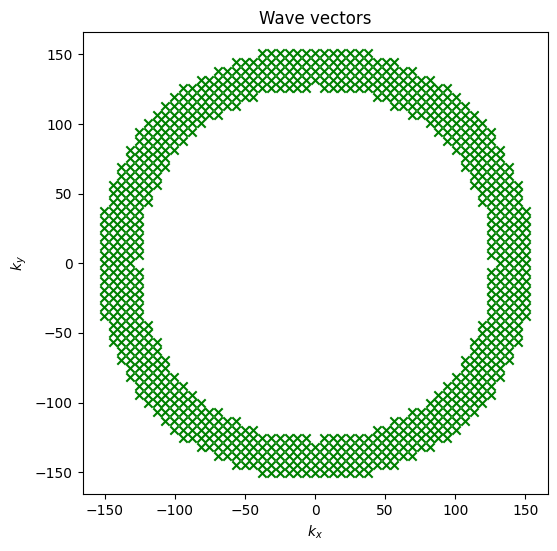

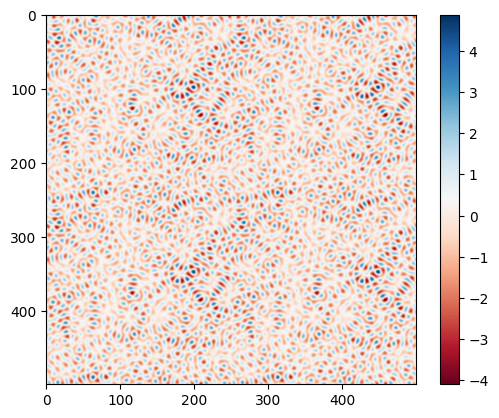

In [ ]:
# ---== space and fourier discretization ==--- #
k = generate_k_vectors(50*np.pi, K_min=40*np.pi, num_per_dim=100)
plot_wave_vectors(k)

# ---== define f ==--- #
phi = np.random.uniform(0, 2 * np.pi, k.shape[0])
f = lambda x, y, k : 1./np.sqrt(k.shape[0]) * np.sum(np.sqrt(2)*(np.cos(k[:, 0]*x +  k[:, 1]*y + phi)))

plot_gaussian_field(f, k)

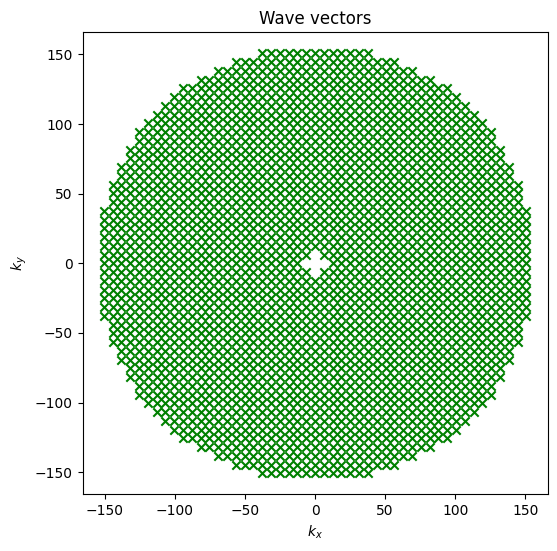

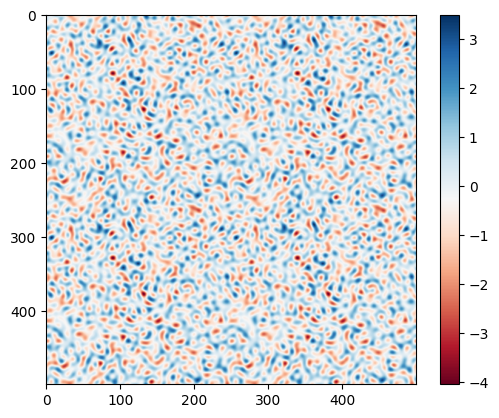

In [41]:
# ---== space and fourier discretization ==--- #
k = generate_k_vectors(50*np.pi, K_min=2*np.pi, num_per_dim=100)
plot_wave_vectors(k)

# ---== define f ==--- #
phi = np.random.uniform(0, 2 * np.pi, k.shape[0])
f = lambda x, y, k : 1./np.sqrt(k.shape[0]) * np.sum(np.sqrt(2)*(np.cos(k[:, 0]*x +  k[:, 1]*y + phi)))

plot_gaussian_field(f, k)